# **Understanding Named Entity Recognation Data**


# **Objective**

The objective of this notebook is to be able to understand ner dataset more and extract meningful information. In order to achive this we follow Explanatory Data Analysis(EDA) procedure.

The main section of this notebook organize as follows:

- Load NER Data from kaggle.
- Observation about the whole dataset.
- Select the relevant columns.
- Identify unique entity tagers in the dataset.
- Data cleansing.
- The distribution of top unigrams after removing stop words.
- The distribution of top biagrams after removing stop words.
- Conclusion


# Imports and Setup

In [1]:
import pandas as pd
pd.set_option('max_colwidth',150)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from string import punctuation
import re
import os
from sklearn.feature_extraction.text import CountVectorizer
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline

# Download the Datasets

In [2]:
pathdir = "/content/data"

In [3]:
def download_dataset():
  
  if not os.path.isfile('ner.csv'):

    # Downloading Annotated Corpus for Named Entity Recognition dataset
    !gdown https://drive.google.com/uc?id=13y8JNgL5TQ4x-yufpBOv3QBsEiE051sE

  if not os.path.exists(pathdir):
    # Make a data folder to store the data
    !mkdir data

    !mv /content/ner.csv ./data


In [4]:
download_dataset()

# Load Data

In [5]:
#specify the path to data location

filepath = '/content/data/ner.csv'
data = pd.read_csv(filepath, encoding = "latin1", on_bad_lines='skip')


In [6]:
#Verify that the data is loaded correctly
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
lemma,thousand,of,demonstr,have,march
next-lemma,of,demonstr,have,march,through
next-next-lemma,demonstr,have,march,through,london
next-next-pos,NNS,VBP,VBN,IN,NNP
next-next-shape,lowercase,lowercase,lowercase,lowercase,capitalized
next-next-word,demonstrators,have,marched,through,London
next-pos,IN,NNS,VBP,VBN,IN
next-shape,lowercase,lowercase,lowercase,lowercase,lowercase
next-word,of,demonstrators,have,marched,through


In [7]:
#totally the data have 1050795 rows and 25 columns
data.shape

(1050795, 25)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050795 entries, 0 to 1050794
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1050795 non-null  int64  
 1   lemma            1050795 non-null  object 
 2   next-lemma       1050795 non-null  object 
 3   next-next-lemma  1050795 non-null  object 
 4   next-next-pos    1050795 non-null  object 
 5   next-next-shape  1050795 non-null  object 
 6   next-next-word   1050795 non-null  object 
 7   next-pos         1050795 non-null  object 
 8   next-shape       1050794 non-null  object 
 9   next-word        1050794 non-null  object 
 10  pos              1050794 non-null  object 
 11  prev-iob         1050794 non-null  object 
 12  prev-lemma       1050794 non-null  object 
 13  prev-pos         1050794 non-null  object 
 14  prev-prev-iob    1050794 non-null  object 
 15  prev-prev-lemma  1050794 non-null  object 
 16  prev-prev-pos    1

In [9]:
data.isnull().sum()

Unnamed: 0         0
lemma              0
next-lemma         0
next-next-lemma    0
next-next-pos      0
next-next-shape    0
next-next-word     0
next-pos           0
next-shape         1
next-word          1
pos                1
prev-iob           1
prev-lemma         1
prev-pos           1
prev-prev-iob      1
prev-prev-lemma    1
prev-prev-pos      1
prev-prev-shape    1
prev-prev-word     1
prev-shape         1
prev-word          1
sentence_idx       1
shape              1
word               1
tag                1
dtype: int64

# Observation about the whole data

- The data has 25 columns and 1050794 rows
- 17 columns of the data have null values. 
- data type of the columns int(1), float(1), and object(23)



# Select the data which contains only Sentence, Word and tag columns

In [10]:
ner_data = data[['sentence_idx', 'word', 'tag']]

In [11]:
ner_data.shape

(1050795, 3)

In [12]:
ner_data.head()

,sentence_idx,word,tag
0,1.0,Thousands,O
1,1.0,of,O
2,1.0,demonstrators,O
3,1.0,have,O
4,1.0,marched,O


In [13]:
ner_data.isnull().sum()

sentence_idx    1
word            1
tag             1
dtype: int64

In [14]:
#drop null value
ner_data = ner_data.dropna()

In [15]:
# the total number of unique sentence
len(ner_data['sentence_idx'].unique())

35177

In [16]:
# the total number of unique word
len(ner_data['word'].unique())

30172

In [17]:
# the total number of unique tag
len(ner_data['tag'].unique())

17

In [18]:
ner_data['tag'].value_counts(dropna=False)[1:]

B-geo    37525
B-tim    20193
B-org    20184
I-per    17382
B-per    17011
I-org    16537
B-gpe    16392
I-geo     7409
I-tim     6298
B-art      434
B-eve      348
I-eve      297
I-art      280
I-gpe      229
B-nat      226
I-nat       76
Name: tag, dtype: int64

## Meaning of BIO Taggers
- The IOB format (short for inside, outside, beginning), also commonly referred to as the BIO format, is a common tagging format for tagging tokens in a chunking task in computational linguistics (ex. named-entity recognition).

 - B represent Beginning of an entity
 - I represent Inside an entity
 - O represent Outside entity

## Essential info about entities in the datasets:

    geo = Geographical Entity
    org = Organization
    per = Person
    gpe = Geopolitical Entity
    tim = Time indicator
    art = Artifact
    eve = Event
    nat = Natural Phenomenon


## Observation about the data

- The data has totally 35177 sentences
- The data has totally 30172 unique words
- The data has totally 17 unique tags. The tag names and their total count values are:
        O        889973
        B-geo     37525
        B-tim     20193
        B-org     20184
        I-per     17382
        B-per     17011
        I-org     16537
        B-gpe     16392
        I-geo      7409
        I-tim      6298
        B-art       434
        B-eve       348
        I-eve       297
        I-art       280
        I-gpe       229
        B-nat       226
        I-nat        76


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

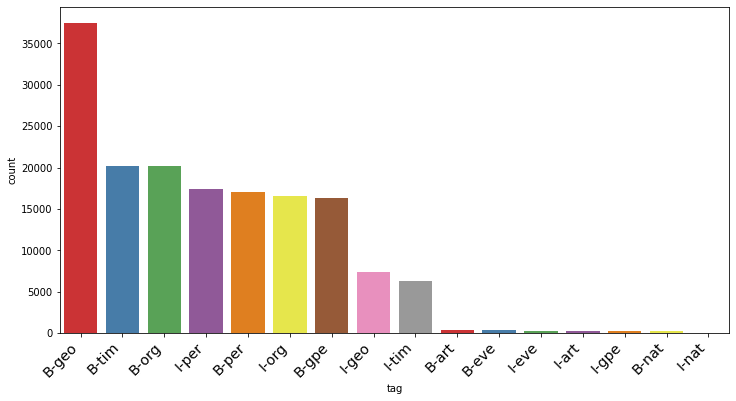

In [19]:
plt.figure(figsize=(12,6))
publication_plot = sns.countplot(
    data=ner_data,
    x='tag',
    palette='Set1',
    order = ner_data['tag'].value_counts()[1:].index
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# observation 
- As we can see from the above chart,the classes are unbalanced. Geographical entity, time indicator, organizations and persons are heavily represented.

In [20]:
b=[]
for i in range(5):
  a = data[data['sentence_idx'] == i+1]['word']
  b.append(' '.join(a))
b[0].split('.')


['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country ',
 ' Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country ',
 '']

In [21]:
# concat words and build sentences
sentences=[]
def concat_words(df):
    for i in df['sentence_idx'].unique():
      sent = df[df['sentence_idx'] == i]['word']
      sentences.append(' '.join(sent))

    return sentences
sentences = concat_words(ner_data)


In [22]:
len(sentences)

35177

In [23]:
sentences[0:3]

['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country . Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .',
 'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . " Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "',
 'They marched from the Houses of Parliament to a rally in Hyde Park . They marched from the Houses of Parliament to a rally in Hyde Park .']

In [24]:
# convert into dataframe
df_sentences = pd.DataFrame(sentences)
df_sentences.rename(columns={0:'sentences'},inplace=True)
df_sentences.head()

,sentences
0,Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country . ...
1,"Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as "" Bush Number One Terrorist "" and "" Sto..."
2,They marched from the Houses of Parliament to a rally in Hyde Park . They marched from the Houses of Parliament to a rally in Hyde Park .
3,"Police put the number of marchers at 10,000 while organizers claimed it was 1,00,000 . Police put the number of marchers at 10,000 while organizer..."
4,The protest comes on the eve of the annual conference of Britain 's ruling Labor Party in the southern English seaside resort of Brighton . The pr...


## Data cleansing

In [25]:
def remove_special_char(df):
    special_char = list(punctuation)
    for e in ['.','?']:
        special_char.remove(e)
    special_char.append("\n+")
    special_char.append("\s+")
    special_char.append("said")
    special_char.append("says")
    special_char.append("say")
    special_char.append("mr")

    def deep_clean(sentence):
      sentence = str(sentence)
      sentence =sentence.strip()
      sentence = re.sub('<[^>]*>', '', sentence)
      for char in special_char:
          sentence = sentence.replace(char, '')
      return sentence

    df['sentences'] = df['sentences'].apply(deep_clean)
    return df

In [26]:
df_sentences = remove_special_char(df_sentences)

## The distribution of word count in the sentences

In [27]:
df_sentences['word_count'] = df_sentences['sentences'].apply(lambda x: len(x.split()))

In [28]:
df_sentences['word_count'].describe([0.1,0.25,0.5,0.75,0.95])

count    35177.000000
mean        28.302499
std         14.566342
min          1.000000
10%         13.000000
25%         18.000000
50%         25.000000
75%         36.000000
95%         58.000000
max        130.000000
Name: word_count, dtype: float64

In [29]:
df_sentences[df_sentences['word_count']<6]['sentences'].count()

101

In [30]:
df_sentences[df_sentences['word_count']<6]['sentences'].head()

1594                               John Garang John Garang
2491     IRAQPOVERTY  Washington  IRAQPOVERTY  Washington 
4809                     Janice Karpinski Janice Karpinski
8411                                               The The
12943                 The assassination occurred Tuesday .
Name: sentences, dtype: object

In [31]:
df_sentences[df_sentences['word_count']>100]['sentences'].count()

12

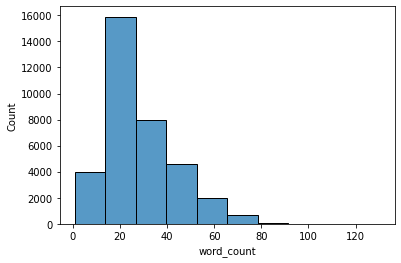

In [32]:
sns.histplot(df_sentences['word_count'],
                 bins=10)




- The word count of the sentence is between 1 and 130. 
- 75% of the data word count is 36. 
- There are 100 sentences their word count is less than 6 and 13 sentences
their word count is above 100.

## The distribution of top unigrams after removing stop words


In [33]:
def get_top_n_words(corpus, n=None, language=None):
  if language=='english':
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
  else:
    vec = CountVectorizer().fit(corpus)

  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]


officials 3396
president 3335
mr 3106
government 3015
killed 2892
people 2821
new 2123
united 2091
military 2026
country 1962
police 1930
minister 1836
iraq 1820
security 1683
states 1546
year 1494
tuesday 1384
group 1382
forces 1337
world 1333


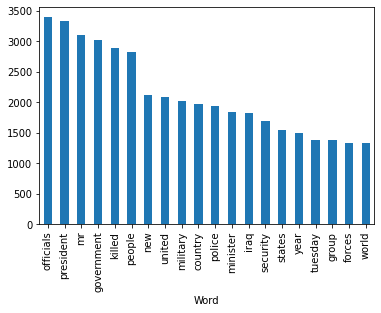

In [34]:
common_words = get_top_n_words(df_sentences['sentences'], 20, 'english')
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Word' , 'count'])
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot.bar()

## The distribution of top bigrams after removing stop words




In [35]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


united states 1385
prime minister 1082
united nations 589
president bush 500
bird flu 415
human rights 409
european union 350
news agency 323
north korea 317
mr bush 310
security council 308
security forces 302
white house 293
gaza strip 276
foreign minister 266
people killed 252
new york 246
west bank 242
nuclear weapons 238
nuclear program 206
militant group 190
middle east 185
secretary state 185
roadside bomb 181
foreign ministry 179


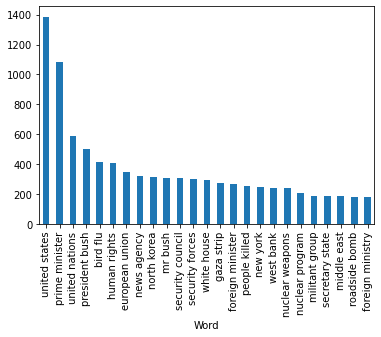

In [36]:
common_words = get_top_n_bigram(df_sentences['sentences'], 25)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Word' , 'count'])
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot.bar()

## Conclusions:

- The above explanatory data analysis proof that entity classes disirbutions are unbalanced. Geographical entity, time indicator, organizations and persons are heavily represented.

- The EDA shows that there are sentences with few numbers of word counts, these needs to be cleaned as these articles might not have a complete sentence.

- Some of sentences are duplicated more than one.




## Acknowledgements

- The code get_top_n_bigram function is adapted from [towardsdatascience](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)